# Exam IHE Transient Groundwater Feb 2020.

@T.N.Olsthoorn

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as W
from numpy.random import randn
import matplotlib as mpl

font = {'family' : 'DeJaVu sans',
        'weight' : 'normal',
        'size'   : 16}

mpl.rc('font', **font)



def newfig(title='?', xlabel='?', ylabel='?', xscale='linear', yscale='linear', xlim=None, ylim=None, size_inches=(14, 7)):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    if isinstance(title, tuple):
        ax.set_title(title[0], {'fontsize' : title[1]})
    else:
        ax.set_title(title)
    if isinstance(xlabel, tuple):
        ax.set_xlabel(xlabel[0], {'size' :xlabel[1]})
    else:
        ax.set_xlabel(xlabel)
    if isinstance(ylabel, tuple):
        ax.set_ylabel(ylabel[0], {'size' : ylabel[1]})
    else:
        ax.set_ylabel(ylabel)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.set_xscale(xscale); ax.set_yscale(yscale)
    ax.grid()
    return ax

# Question 1

1. Explain what is meant by air-entry pressure, and how you interpret it in terms of groundwater?
2. What happens to the water level in a piezometer installed in a confined aquifer if suddenly a load equal to a pressure increase $\Delta p$ is placed on ground surface?
3. What happens to the water level in a piezometer if the barometer pressure suddenly change by an amount $\Delta p$?
4. Explain the difference, what causes it.
5. If a pressure transducer is placed at a fixed elevation below the water level in the piezometer, then what changes would it register in the two situations described in the two previous questions. A pressure transducer measures and registers the absolute pressure, i.e. water + air.


# Question 2

The change of head in a strip of land with width $L$ [m] between two ditches caused by a sudden change of water level equal to $A$ [m] at the left ditch and $B$ [m] at the right ditch, can be computed using the formula that is valid for an infinite aquifer (x>0) bounded by surface water at (x=0), if we apply superposition. The formula for the infinite aquifer is
$$s(x, t) = A\, \mbox{erfc}\left(x \sqrt{\frac{S}{4 kD t}}\right)$$

In preparation of the superposition, a superposition scheme is drawn (see figure), showing the strip of land in dark yellow and the first few of the infinite series of mirror ditches. Error show the direction and size of the change of head at all ditches at $t=0$. Is this scheme correct? Explain why or why not that is the case.


The first term of formula for drainage of a strip of land in which the head is at $t=0$ is uniform and equal to A [m] above the ditches on either side is given by

$$s(x,t) \approx A \frac 4 \pi \cos \left(\frac \pi 2 \frac {x}{b}\right)\exp\left(-\left(\frac \pi {2}\right)^2\frac t T \right),\,\,\,\,\,T=\frac {b^2 S}{kD t}$$

1. What does this equation tell you? What's happening here? What name would you give to $T$ and why?
2. What is the half time of this drainage process?
3. How would you compare the rate of drainage of a desert 500 km wide between surface water and a arable field of 100 m wide between ditches, while both have the aquifer properties?

# Question 3

The simplified Theis solution for the drawdown due to a pumping well in a (un)confined aquifer reads

$$ s(r,t) = \frac{2.3 Q}{4 \pi kD} \log \left(\sqrt{\frac{2.25 kD t}{r^2 S}} \right)$$

A pumping test was held, with an extraction of $Q = 2400 m^3/d$. The drawdown was measured in 3 observation wells.

The figure shows the measured drawdown in a number of observation wells as a function of $t/r^2$ versus time on logarithmic scale.

Answer the following questions

1. Determine the transmissivity
2. Determine the storage coefficient
3. If you had only the drawdown in the well? What could you and what could you not determine, and why?
4. What is the radius of influence, show it mathematically.

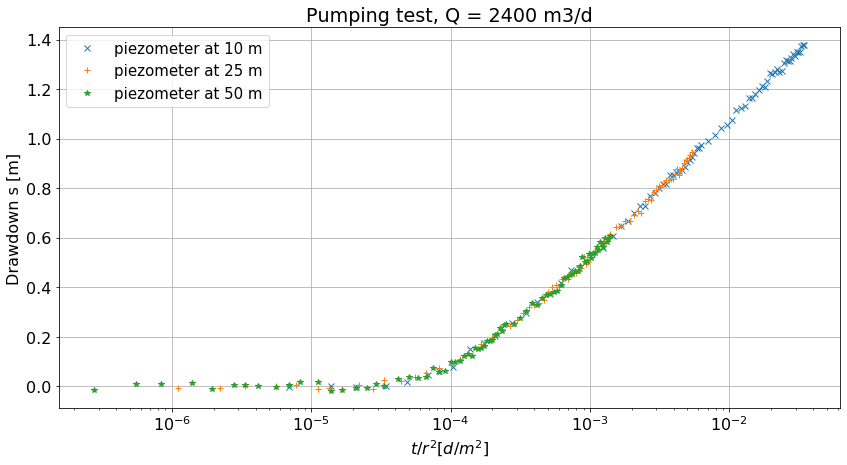

In [42]:
Q = 2400 # m3/d
kD = 775 # m2/d
S = 0.22 # [-]
sigma = 0.01

# Observation wells are at
r = [10, 25, 50] # m
m = ['x', '+', '*']

tmin = np.array([1, 2, 3, 5, 7, 10, 12, 15, 20, 25, 30, 40, 50, 60, 75, 90, 105, 120] +
             [k for k in range(150, 901, 30)] + [k for k in range(1020, 5000, 120)], dtype=float)
td = tmin / (24 * 60)

ax = newfig(f'Pumping test, Q = {Q:.0f} m3/d', '$t/r^2 [d/m^2]$', 'Drawdown s [m]', xscale='log')
s = np.zeros((len(r), len(td)))
for ir, (ri, mi) in enumerate(zip(r, m)):
    u = ri ** 2 * S / (4 * kD * td)
    s[ir] = Q/ (4 * np.pi * kD) * W(u) + sigma * randn(len(td))
    ax.plot(td/ri ** 2, s[ir], mi, label=f'piezometer at {ri:.0f} m')
ax.legend(fontsize=15)
